In [1]:
from load_dataset import load_german_credit_dataset, load_diabetes_dataset
from model_manager import PytorchModelManager
from cf_engine.engine import CFEnginePytorch
from cf_engine.counterfactual import CounterfactualExampleBySubset

In [2]:
import numpy as mp
import matplotlib.pyplot as plt
import pandas as pd
from pandas.plotting import scatter_matrix

In [3]:
dataset = load_diabetes_dataset()
mm = PytorchModelManager(dataset)
dm = mm.get_dir_manager()
try:
    mm.load_model()
except FileNotFoundError:
    mm.train()
    mm.save_model()
# mm.train()
engine = CFEnginePytorch(mm, dataset)

In [4]:
dataset.get_columns()

['Pregnancies',
 'Glucose',
 'BloodPressure',
 'SkinThickness',
 'Insulin',
 'BMI',
 'DiabetesPedigreeFunction',
 'Age',
 'Outcome_0',
 'Outcome_1']

In [6]:
target_name = dataset.get_target_names(False)
pre_target_name = '{}_pred'.format(target_name)
desc = dataset.get_description()
neg = desc[target_name]['category'][0]
pos = desc[target_name]['category'][1]
def plot_subset_cf(subset_attr_cf):
    for i, (feature, subset_cf) in enumerate(subset_attr_cf.items()):
        cf_df = subset_cf.get_cf().reset_index(drop=True)
        original_df = subset_cf.get_instance().reset_index(drop=True)
#         valid_index = cf_df[pre_target_name] != \
#             original_df.loc[cf_df['OriginIndex'], pre_target_name]
#         valid_cf = cf_df.loc[valid_index, :]
#         valid_instance = original_df.loc[valid_cf['OriginIndex'], :]
        valid_index = cf_df[pre_target_name] != original_df[pre_target_name]
        valid_cf = cf_df[valid_index]
        valid_instance = original_df[valid_index]
        pos_valid_cf_attr_value = valid_cf[valid_cf[pre_target_name] == pos][feature]
        neg_valid_cf_attr_value = valid_cf[valid_cf[pre_target_name] == neg][feature]
        pos_valid_instance_attr_value = valid_instance[valid_instance[pre_target_name] == pos][feature]
        neg_valid_instance_attr_value = valid_instance[valid_instance[pre_target_name] == neg][feature]
        # add subplots
        plt.subplot(len(subset_attr_cf), 2, i*2+1)
        plt.hist(neg_valid_instance_attr_value, bins=25, alpha=0.5, label='neg', color='b')
        plt.hist(pos_valid_cf_attr_value, bins=25, alpha=0.5, label='pos', color='r')
        plt.legend(loc='upper right')
        plt.title('{}: neg->pos'.format(feature))
        plt.subplot(len(subset_attr_cf), 2, i*2+2)
        plt.hist(pos_valid_instance_attr_value, bins=25, alpha=0.5, label='pos', color='r')
        plt.hist(neg_valid_cf_attr_value, bins=25, alpha=0.5, label='neg', color='b')
        plt.legend(loc='upper right')
        plt.title('{}: pos->neg'.format(feature))
    plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=1.0)

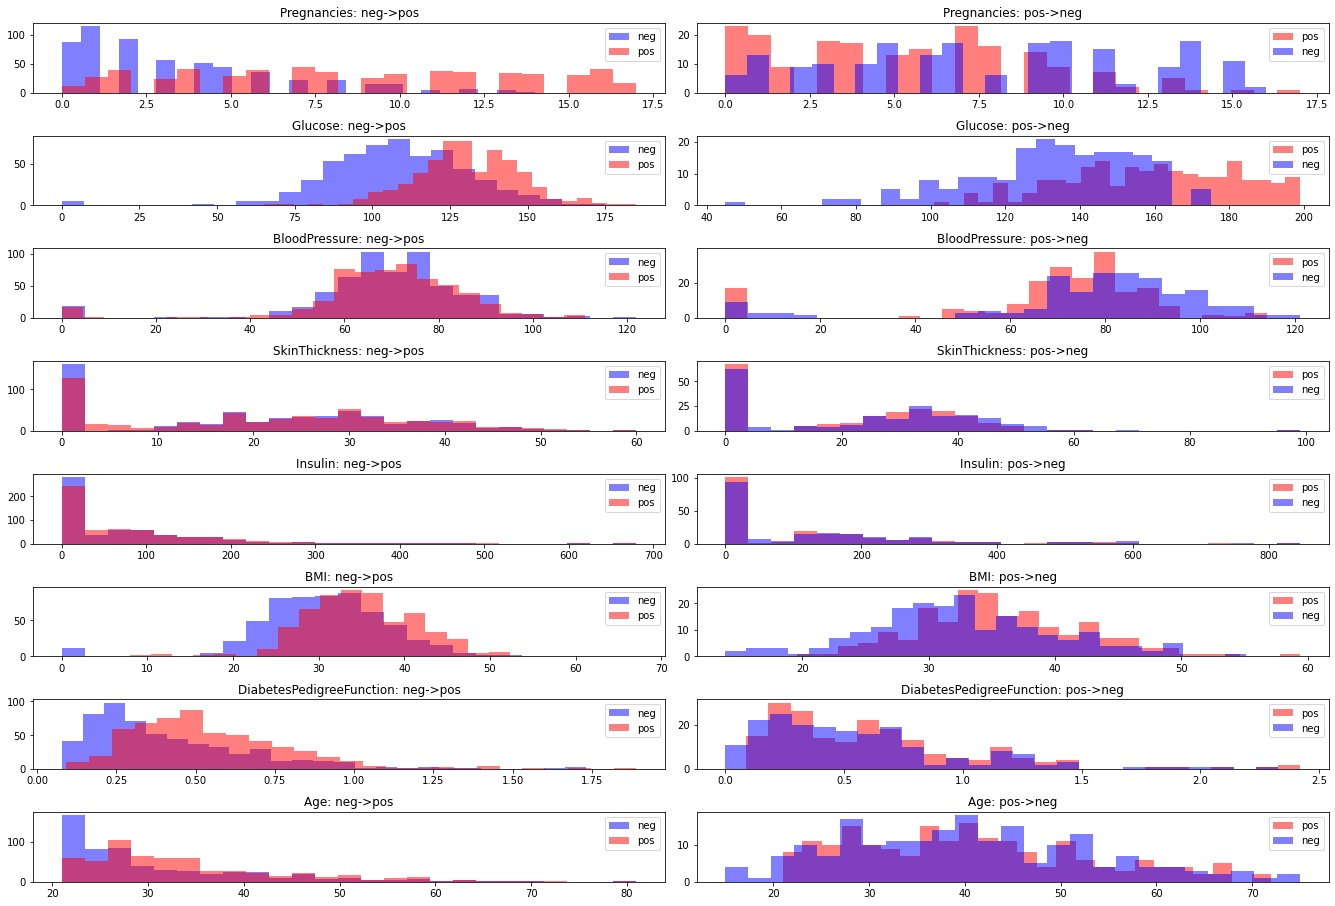

In [7]:
subset = {}
subset_attr_cf = engine.generate_cfs_subset(subset, batch_size=128)
fig = plt.gcf()
fig.set_size_inches(18.5, 12.5)
plot_subset_cf(subset_attr_cf)

[42/42]  Epoch-0, time cost: 2.237s, loss: 0.309, iteration: 2000, validation rate: 0.929
Total time cost: 2.276, validation rate: 0.929, average distance: 0.758, average loss: 0.309
[42/42]  Epoch-0, time cost: 0.385s, loss: 0.339, iteration: 241, validation rate: 1.000
Total time cost: 0.429, validation rate: 1.000, average distance: 0.815, average loss: 0.339
[42/42]  Epoch-0, time cost: 1.079s, loss: 0.313, iteration: 911, validation rate: 1.000
Total time cost: 1.120, validation rate: 1.000, average distance: 0.746, average loss: 0.313


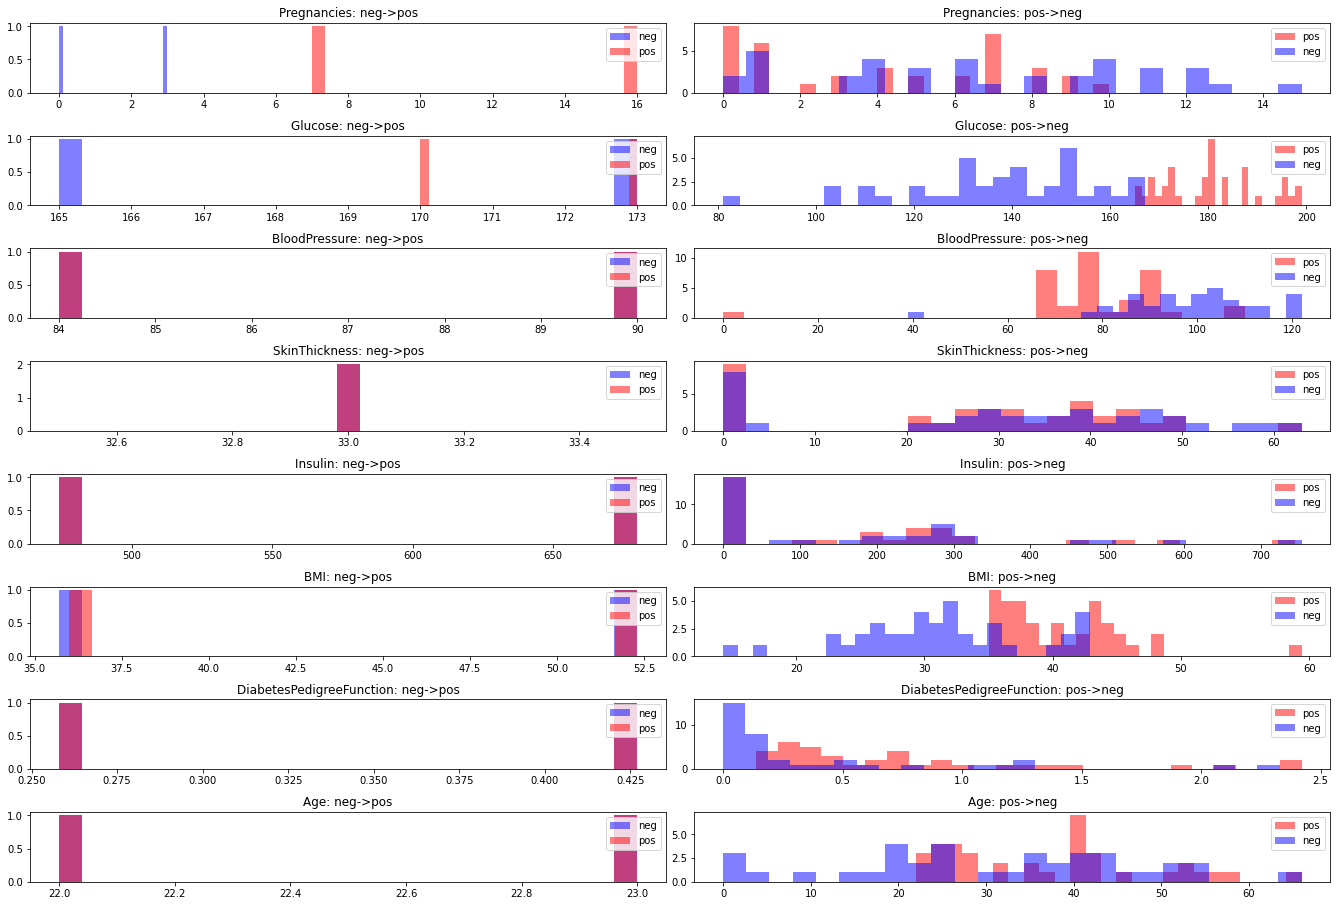

In [12]:
subset = {'Glucose': {'min': 164, 'max': 200}, 'BMI': {'min': 35, 'max':60}}
subset_attr_cf = engine.generate_cfs_subset(subset, batch_size=128)
fig = plt.gcf()
fig.set_size_inches(18.5, 12.5)
plot_subset_cf(subset_attr_cf)

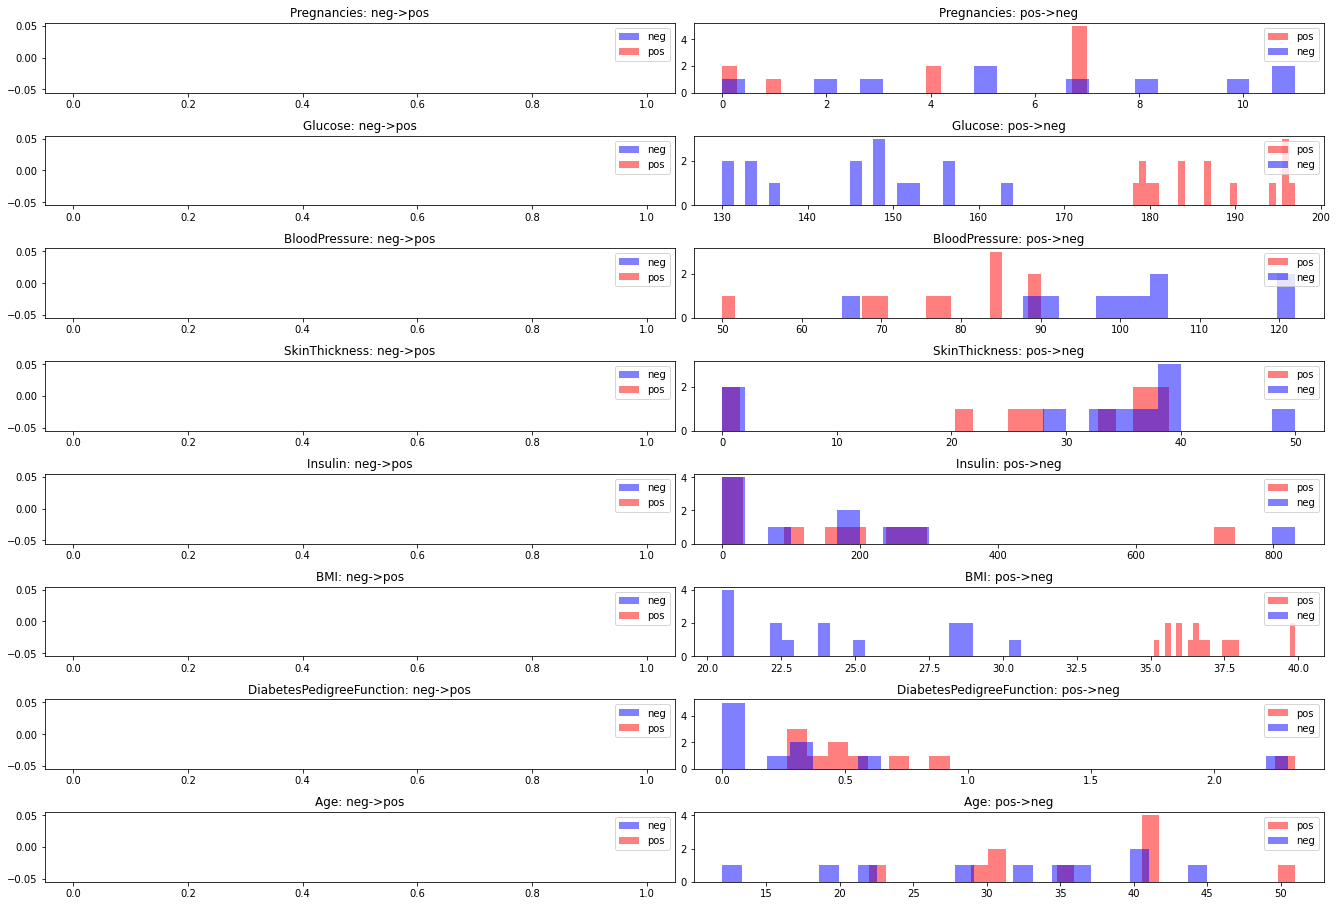

In [15]:
subset = {'Glucose': {'min': 174, 'max': 200}, 'BMI': {'min': 35, 'max':40}}
subset_attr_cf = engine.generate_cfs_subset(subset, batch_size=128)
fig = plt.gcf()
fig.set_size_inches(18.5, 12.5)
plot_subset_cf(subset_attr_cf)